In [1]:
import json, sys
import cv2
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines)
{
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import csv
import pandas as pd

anw_tsv = "data/Ebus/08_10_21_1.tsv"

# Key - task id; Value - dictionary <worker_id, anw>
all_rows = []

data = pd.read_csv(anw_tsv, sep='\t', quotechar='"', doublequote=True, quoting=csv.QUOTE_NONNUMERIC)
data = data[['INPUT:image', 'OUTPUT:result']]

In [4]:
data

,INPUT:image,OUTPUT:result
0,/inno/08_10_2021/08_10_2021_16_26_54_040_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.99838,""y"":0...."
1,/inno/08_10_2021/08_10_2021_16_35_27_869_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.93684,""y"":0...."
2,/inno/08_10_2021/08_10_2021_16_53_49_772_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.02348,""y"":0...."
3,/inno/08_10_2021/08_10_2021_15_55_55_843_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.35223,""y"":0...."
4,/inno/08_10_2021/08_10_2021_15_55_58_386_crop.png,"[{""type"":""polygon"",""data"":[{""x"":8.1E-4,""y"":0.4..."
...,...,...
409,/inno/08_10_2021/08_10_2021_16_31_43_911_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0,""y"":0.36597}..."
410,/inno/08_10_2021/08_10_2021_16_27_09_271_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.19879,""y"":0...."
411,/inno/08_10_2021/08_10_2021_15_55_45_702_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.00103,""y"":0...."
412,/inno/08_10_2021/08_10_2021_16_27_39_749_crop.png,"[{""type"":""polygon"",""data"":[{""x"":0.00123,""y"":0...."


In [5]:
img = data.iloc[0][0]
polygon_json = data.iloc[0][1]

In [6]:
polygon_list = json.loads(polygon_json)
polygon_list

[{'type': 'polygon',
  'data': [{'x': 0.99838, 'y': 0.67171},
   {'x': 0.59919, 'y': 0.22029},
   {'x': 0.57247, 'y': 0.18959},
   {'x': 0.54737, 'y': 0.16612},
   {'x': 0.52146, 'y': 0.14265},
   {'x': 0.51417, 'y': 0.13362},
   {'x': 0.50126, 'y': 0.10092},
   {'x': 0.49487, 'y': 0.07717},
   {'x': 0.50126, 'y': 0.08904},
   {'x': 0.50712, 'y': 0.10567},
   {'x': 0.51936, 'y': 0.12822},
   {'x': 0.56302, 'y': 0.16978},
   {'x': 0.5758, 'y': 0.17928},
   {'x': 0.62797, 'y': 0.23389},
   {'x': 0.77758, 'y': 0.39061},
   {'x': 0.96925, 'y': 0.59244},
   {'x': 0.99853, 'y': 0.62331}]},
 {'type': 'polygon',
  'data': [{'x': 0.32823, 'y': 0.40485},
   {'x': 0.07747, 'y': 0.9961},
   {'x': 0.03913, 'y': 0.99729},
   {'x': 0.31385, 'y': 0.4001},
   {'x': 0.40117, 'y': 0.20421},
   {'x': 0.40862, 'y': 0.17928},
   {'x': 0.42619, 'y': 0.12704},
   {'x': 0.43577, 'y': 0.10685},
   {'x': 0.47251, 'y': 0.06411},
   {'x': 0.47358, 'y': 0.06767},
   {'x': 0.44908, 'y': 0.09498},
   {'x': 0.43897, '

In [7]:
source_img_folder_path = 'C:/Users/impor/Desktop/08_10_2021'
# crop_img_folder_path = 'D:/EBus/Datasets/dataset_v0.1_crop'

def get_source_img_name(name_in_data):
    # Remove prefix
    crop_img_name = name_in_data.rsplit('/', 1)[-1]
    
    # Get source image name
    #source_img_name = crop_img_name.replace('_crop', '')
    
    return crop_img_name

def get_source_img_full_path(name_in_data):
    source_img_name = get_source_img_name(name_in_data)
    return f"{source_img_folder_path}/{source_img_name}"

In [8]:
source_img_path = get_source_img_full_path(img)
source_img_path

'C:/Users/impor/Desktop/08_10_2021/08_10_2021_16_26_54_040_crop.png'

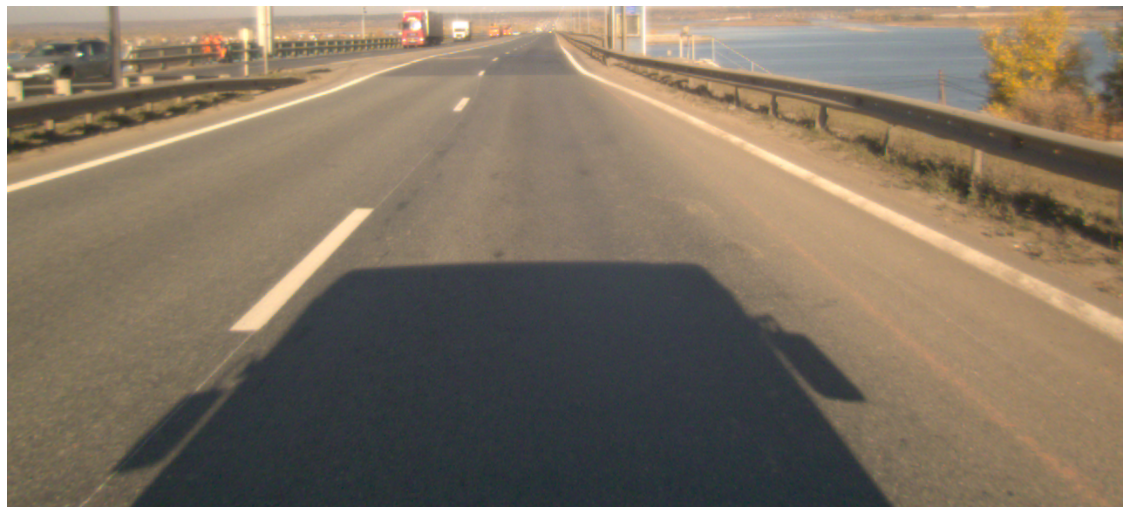

In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

def show_img(img):
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

source_img = mpimg.imread(source_img_path)
show_img(source_img)

In [44]:
SOURCE_IMAGE_WIDTH = 1280
SOURCE_IMAGE_HEIGHT = 1024 - 450

FINAL_IMAGE_WIDTH = 640
FINAL_IMAGE_HEIGHT = 360

In [57]:
def get_polygon_pixel_vertexes(percentage_vertexs):
    pixel_vertexs = []
    
    for cord in percentage_vertexs:
        # Convert to source image persentage
        source_img_perc_x = cord['x']
        source_img_perc_y = cord['y']
                
        x = int(round(source_img_perc_x * SOURCE_IMAGE_WIDTH))
        y = int(round(source_img_perc_y * SOURCE_IMAGE_HEIGHT))
        
        pixel_vertexs.append([x, y])
        
    return pixel_vertexs

In [58]:
def get_all_polygons(pylygon_list):
    pixels_polygons = []
    
    for polygon in pylygon_list:
        points = get_polygon_pixel_vertexes(polygon['data'])
        
        pixels_polygons.append(points)
        
    return pixels_polygons

In [84]:
def show_img_with_labels(index, show_imgs = False):
    img_name = data.iloc[index][0]
    polygon_json = data.iloc[index][1]
    
    polygon_list = json.loads(polygon_json)
    polygons = get_all_polygons(polygon_list)
    
    # Get images
    source_img_name = get_source_img_name(img_name)
    source_img_full_path = get_source_img_full_path(img_name)
    
    source_img = mpimg.imread(source_img_full_path)
    debug_img = source_img.copy()
    
    blank_image = np.zeros((len(source_img), len(source_img[0])), np.uint8)
    
    
    # Draw all polygons on image
    for polygon in polygons:
        polygon = np.array([polygon], np.int32)
        debug_img = cv2.polylines(debug_img, [polygon], True, (0, 0.5, 0), thickness=1)
        blank_image = cv2.fillPoly(blank_image, [polygon], 1)
        
    if show_imgs:
        show_img(debug_img)
        show_img(blank_image)
    
    return debug_img, blank_image

In [85]:
a, b = show_img_with_labels(20)

In [92]:
import tqdm
import os

output_folder_path = 'data/Ebus/labels'

for i in tqdm.tqdm(range(0, 5)): #len(data))):
    debug, label = show_img_with_labels(i)
    
    label = cv2.convertScaleAbs(label, alpha=(255.0))

    name = data.iloc[i][0]
    
    name = name.rsplit('/', 1)[-1]
    name = f'label_{name}'

    cv2.imwrite(os.path.join(output_folder_path, name), label)

100%|██████████| 5/5 [00:00<00:00, 34.73it/s]
